In [68]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import itertools

In [69]:
def cartesian_product(*args_arrays):
    '''
    Cartesian product of an collection of arrays in arbitrary dimensions.
    e.g. cartesian_product([a1, a2], [b1, b2, b3], [c1, c2]) -> [[a1 b1 c1] [a1 b2 c1] .. [a2 b3 c2]]
    '''
    return list(itertools.product(*args_arrays))

# There are N x N points in the grid
N = 6

# the list of points that gets progressively connected
connected_points = []

def connect(point):
    '''
    Draw the line connecting the specified points
    '''
    global connected_points
    connected_points.append(point)

def solve_3x3_grid(offset_x=1, offset_y=N):
    '''
    The particular solution for a 3x3 grid: this solution goes "outside the box"
    '''
    connect([offset_x + 3, offset_y])
    connect([offset_x, offset_y - 3])
    connect([offset_x, offset_y])
    connect([offset_x + 2, offset_y - 2])

def solve_4x4_grid(offset_x=1, offset_y=N):
    '''
    The particular solution for a 4x4 grid: this solution goes "outside the box"
    '''
    connect([offset_x + 4, offset_y])
    connect([offset_x, offset_y - 4])
    connect([offset_x, offset_y - 1])
    connect([offset_x + 3, offset_y - 1])
    connect([offset_x + 3, offset_y - 4])
    connect([offset_x + 1, offset_y - 2])

def connect_borders_from_top(offset_x, offset_y, n_grid):
    '''
    Draws the outside borders starting from top left. This is the starting point for the iterative
    solution of the general problem, which can be solved by staying "inside the box" if N <= 5.
    '''
    connect([offset_x + n_grid -1, offset_y])
    connect([offset_x + n_grid -1, offset_y - n_grid + 1])
    connect([offset_x, offset_y - n_grid + 1])
    connect([offset_x, offset_y - 1])

def solve_grid(n_residual_grid=N, iteration=0):
    '''
    Recursively drawing the outer borders until an "elementar" grid is found corresponding to 3 or 4 points per side
    '''
    if (n_residual_grid <= 2):
        raise Exception('Cannot solve for a grid with less than 3 points per side')
    elif (n_residual_grid == 3):
        solve_3x3_grid(offset_x=1+iteration, offset_y=N-iteration)
    elif (n_residual_grid == 4):
        solve_4x4_grid(offset_x=1+iteration, offset_y=N-iteration)
    else:
        connect_borders_from_top(offset_x=1+iteration, offset_y=N-iteration, n_grid=n_residual_grid)
        # NB: without borders, the inner residual grid is reduced by two points on each side
        solve_grid(n_residual_grid=n_residual_grid - 2, iteration=iteration+1)

Solved a squared grid with 6 points per side
10 lines have been drawn: the expected number is 10
[[1, 6], [6, 6], [6, 1], [1, 1], [1, 5], [6, 5], [2, 1], [2, 4], [5, 4], [5, 1], [3, 3]]


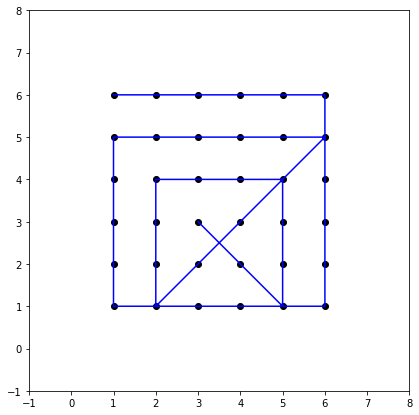

In [70]:
#set the starting point
connect([1, N])
#
# SOLVE THE GRID
#
solve_grid()

first_Ns = np.linspace(1, N, num=N)
squared_grid = cartesian_product(first_Ns, first_Ns)

# flattened (unzipped) xs and ys of the grid points
grid_x, grid_y = zip(*squared_grid)

#plt.plot(*zip(*connected_points), '-b')
fig, ax = plt.subplots(figsize=(7,7));

#
# Draw the squared grid
# TODO display no axes info
ax.set(xlim=(-1, N +2), ylim=(-1, N + 2))

# adjust image size so that it's squared
ax.set_aspect('equal')
ax.plot(grid_x, grid_y,'ko');

def animate(i):
    x, y = zip(*connected_points[:i+1])
    line.set_data(x, y)
    return line,

line, = ax.plot([],[],'b');
anim = FuncAnimation(fig, animate, frames=len(connected_points), interval=500, blit=True);

num_drawn_lines=len(connected_points) - 1;
num_expected_lines = 2 * (N - 1)

assert num_drawn_lines==num_expected_lines, 'The number of drawn lines({0}) is not as expected({1})'.format(num_drawn_lines, num_expected_lines)
print('Solved a squared grid with {} points per side'.format(N))
print('{0} lines have been drawn: the expected number is {1}'.format(num_drawn_lines, num_expected_lines))
print(connected_points)

plt.rcParams['animation.html'] = 'jshtml' #'html5'
anim

#anim.save('squared_grid_puzzle.mp4')